In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import json

# load data

In [10]:
dataset = pd.read_csv("/Users/lumf/Downloads/abtest_20191008.csv", encoding='gbk')
dataset.head()

,访问终端系统,点击位置,访问页url,访问日期,访问页内容,访问终端,用户id,设备号,访问终端版本,UV,用户数,PV,Unnamed: 12
0,IOS,healthmall_goods_vip,(null),2019-09-26,"{ ""test_code"" : ""a""}",用户APP,82472957,AA736DC2-4BA3-473F-94A2-FEF56613CB55,3.7.6,1,1,1,NaN
1,IOS,healthmall_goods_vip,healthmall_goods,2019-09-21,NaN,用户APP,103340974,F3652E5A-C181-428B-82DA-F4E248FBB6D6,3.7.4,1,1,1,NaN
2,IOS,healthmall_goods_vip,healthmall_goods,2019-09-25,"{ ""test_code"" : ""a""}",用户APP,96920857,ACC6832A-EE26-4191-AD13-5BE84EB43F91,3.7.5,1,1,1,NaN
3,IOS,healthmall_goods_vip,healthmall_goods,2019-09-26,NaN,用户APP,60337789,EC6E6A4D-705B-4299-BEB8-836DDEFE57C1,3.7.4,1,1,1,NaN
4,IOS,healthmall_goods_vip,healthmall_goods,2019-09-26,"{ ""test_code"" : ""b""}",用户APP,\N,59B4D72C-A02B-465C-AC11-737141DE176D,3.7.6,1,0,1,NaN


In [11]:
has_abtest = dataset['访问页内容'].str.contains("test_code", na = False)
df_abtest = dataset[has_abtest]
# print(has_abtest.isnull().sum())
df_abtest.head()

,访问终端系统,点击位置,访问页url,访问日期,访问页内容,访问终端,用户id,设备号,访问终端版本,UV,用户数,PV,Unnamed: 12
0,IOS,healthmall_goods_vip,(null),2019-09-26,"{ ""test_code"" : ""a""}",用户APP,82472957,AA736DC2-4BA3-473F-94A2-FEF56613CB55,3.7.6,1,1,1,NaN
2,IOS,healthmall_goods_vip,healthmall_goods,2019-09-25,"{ ""test_code"" : ""a""}",用户APP,96920857,ACC6832A-EE26-4191-AD13-5BE84EB43F91,3.7.5,1,1,1,NaN
4,IOS,healthmall_goods_vip,healthmall_goods,2019-09-26,"{ ""test_code"" : ""b""}",用户APP,\N,59B4D72C-A02B-465C-AC11-737141DE176D,3.7.6,1,0,1,NaN
5,IOS,healthmall_goods_vip,healthmall_goods,2019-09-26,"{ ""test_code"" : ""b""}",用户APP,\N,E54F4D9C-C27B-4663-8672-3A97960E6640,3.7.6,1,0,1,NaN
6,IOS,healthmall_goods_vip,healthmall_goods,2019-09-26,"{ ""test_code"" : ""b""}",用户APP,87705342,335FFC7F-43FE-498F-A4F7-DF8792962FAE,3.7.6,1,1,3,NaN


In [12]:
def print_group_info(group_name, df_abtest):
#     print("--group:", group_name)
    df_test_ios = df_abtest[df_abtest['访问终端系统'] == "IOS"]
    # display(df_test_ios.iloc[0:5])
    count_ios = len(df_test_ios)
#     print("ios count=", count_ios)
    
    df_test_android = df_abtest[df_abtest['访问终端系统'] == "安卓"]
    # display(df_test_android.iloc[0:5])
    count_android = len(df_test_android)
#     print("android count=", count_android)

    df_test_a = df_abtest[df_abtest['访问页内容'].str.contains("a")]
    count_a = len(df_test_a)
#     print("test_a count=", count_a)
    df_test_b = df_abtest[df_abtest['访问页内容'].str.contains("b")]
    count_b = len(df_test_b)
#     print("test_b count=", count_b)
    # display(df_test_a.iloc[0:5])
    # display(df_test_b.iloc[0:5])
    df_hasnot_userid = df_abtest[df_abtest['用户id'] == "\\N"]
#     print("without userid count=", len(df_hasnot_userid))
    df_useridnot_test_a = df_hasnot_userid[df_hasnot_userid['访问页内容'].str.contains("a")]
    count_a_userid_empty = len(df_useridnot_test_a)
#     print("  count_a_userid_empty=", count_a_userid_empty)
    df_b_userid_empty = df_hasnot_userid[df_hasnot_userid['访问页内容'].str.contains("b")]
    count_b_userid_empty = len(df_b_userid_empty)
#     print("  count_b_userid_empty=", count_b_userid_empty)

    df_has_userid = df_abtest[df_abtest['用户id'] != "\\N"]
#     print("with userid count=", len(df_has_userid))
    df_userid_test_a = df_has_userid[df_has_userid['访问页内容'].str.contains("a")]
    count_a_userid = len(df_userid_test_a)
#     print("  count_a_userid=", count_a_userid)
    df_userid_test_b = df_has_userid[df_has_userid['访问页内容'].str.contains("b")]
    count_b_userid = len(df_userid_test_b)
#     print("  count_b_userid=", count_b_userid)
    
    
    result =  {
        "group": group_name,
        "count_ios": count_ios,
        "count_android" : count_android,
        "count_a": count_a,
        "count_b" : count_b,
        "count_(a-b)": count_a - count_b,
        "count_a_userid": count_a_userid,
        "count_b_userid": count_b_userid,
        "count_(a-b)_userid" : count_a_userid - count_b_userid,
        "count_a_userid_empty": count_a_userid_empty,
        "count_b_userid_empty": count_b_userid_empty,
        "count_(a-b)_userid_empty": count_a_userid_empty - count_b_userid_empty
        
    }
    return result

infos = []
info_total = print_group_info("total", df_abtest)
infos.append(info_total)


In [13]:
for name, group in df_abtest.groupby('访问日期'):
    info = print_group_info(name, group)
    infos.append(info)

In [14]:
df_infos = pd.DataFrame(infos)

In [15]:
df_infos.head(30)

,count_(a-b),count_(a-b)_userid,count_(a-b)_userid_empty,count_a,count_a_userid,count_a_userid_empty,count_android,count_b,count_b_userid,count_b_userid_empty,count_ios,group
0,395,273,122,3214,2559,655,3840,2819,2286,533,2193,total
1,-1,0,-1,0,0,0,1,1,0,1,0,2019-09-19
2,-3,-2,-1,4,2,2,11,7,4,3,0,2019-09-20
3,2,3,-1,9,7,2,16,7,4,3,0,2019-09-23
4,-8,-7,-1,26,10,16,19,34,17,17,41,2019-09-24
5,1,-1,2,60,34,26,16,59,35,24,103,2019-09-25
6,16,23,-7,168,108,60,159,152,85,67,161,2019-09-26
7,61,54,7,317,191,126,443,256,137,119,130,2019-09-27
8,-22,-21,-1,162,137,25,256,184,158,26,90,2019-09-28
9,-14,-15,1,185,161,24,281,199,176,23,103,2019-09-29


In [16]:
import matplotlib.pyplot as plt
# plt.figure()
# plt.plot()

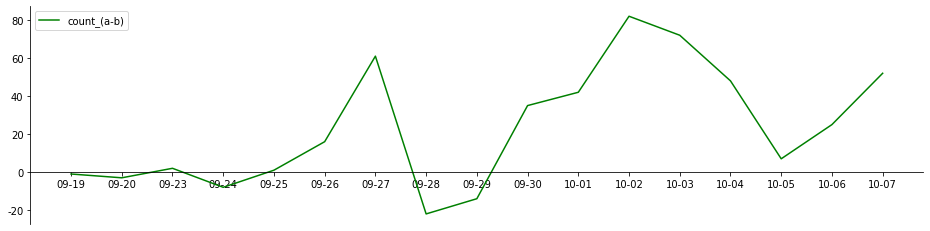

In [43]:
plt.figure(figsize=(16, 4))
ticks_x = df_infos["group"][1:].apply(lambda tick : tick[5:])
ticks_y = df_infos["count_(a-b)"][1:]
plt.plot(ticks_x, ticks_y, color = 'green', label ='count_(a-b)')
plt.plot([t,t],[0,np.cos(t)], color="pink", linestyle="--")
plt.legend(loc='upper left',frameon=True)
# plt.show()

# 移动X，Y坐标轴(例如，坐标轴居中，显示四个象限)
# 由于坐标轴包含四个(top/bottom/left/right), 将top和right坐标轴颜色设为none;
ax = plt.gca() #gca() Get Current Axes; gcf() Get Current Figure.
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# 移动bottom和left至数据空间的coordinate 0
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
# ax.yaxis.set_ticks_position('left')
# ax.spines['left'].set_position(('data',0))

# process data